In [8]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Finite element method (FEM) in 2d
Solve the following 2d diffusion boundary value problem using linear finite elements.

In [15]:
%% 2d boundary value problem:
%   -div(k(x)*grad(u(x)))=f(x) inside of the domain
%   u(x)=U(x) at GammaD
%   k(x)*(du/dn)(x)=g(x) at GammaN

Consider rectangular domain $(0,L_1)\times(0,L_2)$ and its regular triangulation, i.e. prepare input matrices NODE, ELEM:

In [77]:
%% example: preparation of a simple network
%  triangulation of a rectangular domain (0,L1)x(0,L2)
L1=4; L2=2;
nx=40; ny=40;
[coords1,coords2]=meshgrid(linspace(0,L1,nx),linspace(0,L2,ny));
coords1=coords1(:); coords2=coords2(:);
ELEM=rectangle_triangulation(nx,ny);
NODE=[coords1,coords2];
n_NODE=size(NODE,1);
n_ELEM=size(ELEM,1);
CENTERS=[mean(coords1(ELEM),2),mean(coords2(ELEM),2)];
k=@(x)sin(5*x(:,1))+2;

Preparation of boundary conditions and material inputs:

In [78]:
%% boundary conditions inputs
%DBOUNDARY=((coords1==L1)|(coords2==0));
DBOUNDARY=((coords1==0)|(coords1==L1)|(coords2==0)|(coords2==L2));
%DBOUNDARY=DBOUNDARY|((coords1==1)&(coords2<=1))|((coords2==1)&(coords1<=1));
DVALUE=2*ones(sum(DBOUNDARY),1);
%NBOUNDARY=[(1:(ny-1))' (2:ny)'];
NBOUNDARY=[];
NVALUE=[];
%NVALUE=0.1*ones(size(NBOUNDARY,1),1);
FREENODE=true(n_NODE,1); FREENODE(DBOUNDARY)=false;

%% other input data
MATERIALS=k(CENTERS); %ones(n_ELEM,1);
F=-10*ones(n_ELEM,1);

Construct FEM matrix and right hand side vector using local matrices and vectors:

In [79]:
%% construction of global "stiffness" matrix and rhs
AREAS=polyarea(coords1(ELEM),coords2(ELEM),2);
A=zeros(n_NODE);
b=zeros(n_NODE,1);
for i=1:n_ELEM
    % add local "stiffness" matrix
    x=NODE(ELEM(i,:),:);
    B_=[x(2,2)-x(3,2) x(3,2)-x(1,2) x(1,2)-x(2,2)
        x(3,1)-x(2,1) x(1,1)-x(3,1) x(2,1)-x(1,1)];
    A_local=MATERIALS(i)*B_'*B_/4/AREAS(i);
    A(ELEM(i,:),ELEM(i,:))=A(ELEM(i,:),ELEM(i,:))+A_local;
    % add local rhs
    b_local=ones(3,1)/3*F(i)*AREAS(i);
    b(ELEM(i,:))=b(ELEM(i,:))+b_local;
end

Eliminate unknowns corresponding to Dirichlet nodes, modify the r. h. s. vector according to Neumann boundary conditions, and solve the resulting linear system:

In [80]:
%% modifications due to boundary conditions
u=zeros(n_NODE,1);
u(DBOUNDARY)=DVALUE;
b=b-A*u;
for i=1:length(NVALUE)
    x=NODE(NBOUNDARY(i,:),:);
    b(NBOUNDARY(i,:))=b(NBOUNDARY(i,:))+norm(x(1,:)-x(2,:))*NVALUE(i)/2;
end

Plot solution:

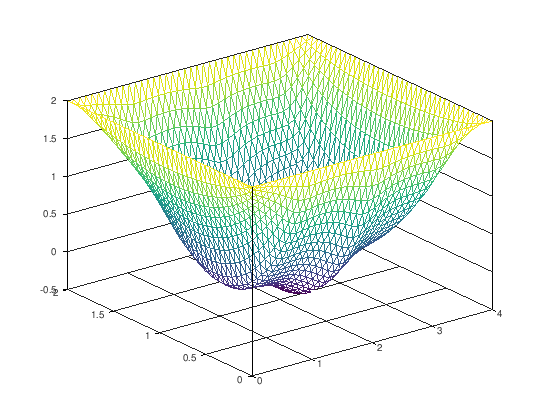

In [81]:
%% solution of the resulting linear system and visualization
u(FREENODE)=A(FREENODE,FREENODE)\b(FREENODE);
figure; trimesh(ELEM,coords1,coords2,u);

## Numerical experiments:
1) Solve the following boundary value problem:

$-\text{div}(k \, \text{grad}(u)) = -10 $  for  $x\in\Omega=(0,4)\times(0,2)$

$u(x)=2$  for  $x\in\partial \Omega$

$k(x) = \sin(x_1)+2$  for  $x=(x_1,x_2)\in\Omega$

2) Solve the following boundary value problem:

$-\text{div}(k \, \text{grad}(u)) = -10 $  for  $x\in\Omega=(0,2)\times(0,2)$

$u(x)=x_1+x_2$  for  $x=(x_1,x_2)\in\partial \Omega$

$k(x)=1$  for  $x\in\Omega$

3) Solve the following boundary value problem:

$-\text{div}(k \, \text{grad}(u)) = -10 $  for  $x\in\Omega=(0,2)\times(0,2)$

$u(x)=\sin(x_1)$  for  $x\in\Gamma_D=(0,2)\times\{0\}\cup(0,2)\times\{2\}$

$k(x)\frac{\text{d}u}{\text{d}n}(x)=0$ for $\partial \Omega \setminus \Gamma_D$

$k(x)=1$  for  $x\in\Omega$

4) Choose a boundary value problem with known analytical solution and compare the solutions.